<a href="https://colab.research.google.com/github/ShounakD1991/Hobby_Project_1/blob/main/Project_Oil_vs_Banks_Stock_Price_during_recession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Domain Knowledge**
---

We all know that the World's oil market is crazy. It has significant effects on the global economy. Several incident between 2007 and 2009 including oil price change from ~ 147 to ~ 32$ a barrel, and global financial crises effected world economy and GDP in 2009. A chain of these incidents caused several leading countries into recession. Let's explore, how the stock price varies from 2006 to 2017 for some of the oil companies and banks in Canada.

In this project, we will also explore the ups and downs in the stock price of The United States Oil Fund (USO) and West Texas Intermediate Light Sweet Crude Oil. The United States Oil Fund is an exchange-traded fund that attempts to track the price of West Texas Intermediate Light Sweet Crude Oil (WTI). WTI is a grade of crude oil used as a benchmark in oil pricing.

---
### **Importing Libraries**
---

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

sns.set_style('whitegrid')
%matplotlib inline

plt.rcParams['figure.figsize']=[20,10]
plt.rcParams['figure.dpi']=100



---
### **Importing Datasets**
---





In [2]:
rbc = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/RBC.csv',index_col='Date') 
cibc = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/CIBC.csv',index_col='Date') 
bmo = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/BMO.csv',index_col='Date')
suncor = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/Suncor.csv',index_col='Date') 
encana = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/Encana.csv',index_col='Date' ) 
cnq = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/CNQ.csv',index_col='Date' ) 
uso = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/USO.csv',index_col='Date') 
wti = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/WTI.csv',index_col='Date')



---
### **Checking the head of DataFrames**
---





#### ***Banks*** :***RBC***,***CIBC***,***BMO***

#### ***Oil Companies*** :***Suncor***,***Encana***,***CNQ***

In [3]:
rbc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,38.90,39.75,38.83,39.59,346000
2006-01-04,39.74,40.36,39.69,40.34,382200
2006-01-05,39.90,39.90,39.40,39.48,261200
2006-01-06,39.50,39.59,39.24,39.28,189600
2006-01-09,39.02,39.32,38.70,39.00,197200


In [4]:
cibc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,65.61,67.25,65.61,66.98,49400
2006-01-04,67.39,67.94,67.20,67.94,30000
2006-01-05,67.39,67.75,67.24,67.47,61200
2006-01-06,67.57,67.80,67.34,67.74,36300
2006-01-09,67.07,67.88,66.98,67.63,37900


In [5]:
bmo.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,55.71,57.51,55.71,57.25,73600
2006-01-04,57.50,58.51,57.23,58.36,87300
2006-01-05,57.95,58.09,57.32,57.50,48500
2006-01-06,57.30,57.43,56.99,57.16,26500
2006-01-09,56.40,57.06,56.32,56.67,45400


In [6]:
suncor.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.84,32.87,31.78,32.76,5568200
2006-01-04,32.76,33.14,32.15,33.09,4023400
2006-01-05,32.88,32.88,31.99,32.30,4247600
2006-01-06,32.75,33.76,32.51,33.31,4706200
2006-01-09,33.31,33.40,32.55,32.90,3770600


In [7]:
encana.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,45.40,46.86,45.37,46.70,3852900
2006-01-04,46.10,46.39,45.49,46.30,3926300
2006-01-05,45.75,45.88,44.77,45.22,3941700
2006-01-06,45.83,46.18,45.50,45.86,2786900
2006-01-09,45.95,45.99,45.01,45.05,2878100


In [8]:
cnq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,24.81,25.62,24.81,25.48,2674000
2006-01-04,25.44,26.49,25.20,26.44,2312200
2006-01-05,26.18,26.22,25.58,25.72,1878600
2006-01-06,26.00,26.26,25.80,26.00,1391600
2006-01-09,26.00,26.34,25.77,26.16,1510800


In [9]:
uso.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-04-10,68.25,68.50,67.67,68.02,3877300
2006-04-11,68.32,68.39,67.30,68.20,1290900
2006-04-12,68.22,68.81,67.81,67.84,1243700
2006-04-13,67.50,68.99,67.40,68.82,557200
2006-04-17,69.20,69.90,68.68,69.79,903000


In [10]:
wti.head()

,Value
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01




---
### **Combine banks (RBC, CIBC, BMO) and oil companies (Suncor, Encana, CNQ) datasets into a single dataset**
---





In [11]:
bo=pd.concat([rbc,cibc,bmo,suncor,encana,cnq],axis=1,keys=['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ'])
bo.head()

RBC                       ...    CNQ                       
             Open   High    Low  Close  ...   High    Low  Close   Volume
Date                                    ...                              
2006-01-03  38.90  39.75  38.83  39.59  ...  25.62  24.81  25.48  2674000
2006-01-04  39.74  40.36  39.69  40.34  ...  26.49  25.20  26.44  2312200
2006-01-05  39.90  39.90  39.40  39.48  ...  26.22  25.58  25.72  1878600
2006-01-06  39.50  39.59  39.24  39.28  ...  26.26  25.80  26.00  1391600
2006-01-09  39.02  39.32  38.70  39.00  ...  26.34  25.77  26.16  1510800

[5 rows x 30 columns]



---
### **Get the list of column headers or column name**
---





In [12]:
bo.columns.names

FrozenList([None, None])



---
### **Changing the column name to 'Entity' and 'Stock'**
---



In [13]:
bo.columns.names=['Entity','Stock']
bo.head()

Entity        RBC                       ...    CNQ                       
Stock        Open   High    Low  Close  ...   High    Low  Close   Volume
Date                                    ...                              
2006-01-03  38.90  39.75  38.83  39.59  ...  25.62  24.81  25.48  2674000
2006-01-04  39.74  40.36  39.69  40.34  ...  26.49  25.20  26.44  2312200
2006-01-05  39.90  39.90  39.40  39.48  ...  26.22  25.58  25.72  1878600
2006-01-06  39.50  39.59  39.24  39.28  ...  26.26  25.80  26.00  1391600
2006-01-09  39.02  39.32  38.70  39.00  ...  26.34  25.77  26.16  1510800

[5 rows x 30 columns]



---
###  **The max and min Close price for each bank's stock throughout the time period**
---





In [14]:
max=bo.xs(key='Close',level='Stock',axis=1).max()
max

Entity
RBC        75.90
CIBC      108.24
BMO        78.03
Suncor     72.95
Encana     96.89
CNQ        53.70
dtype: float64

In [15]:
min=bo.xs(key='Close',level='Stock',axis=1).min()
min

Entity
RBC       20.62
CIBC      28.39
BMO       19.51
Suncor    14.66
Encana     3.01
CNQ       13.49
dtype: float64

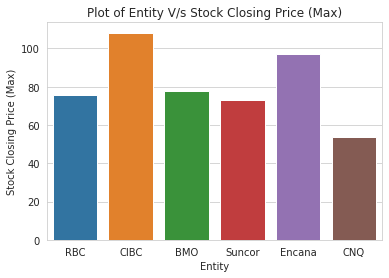

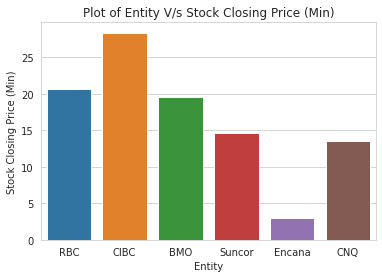

In [16]:
sns.barplot(x=max.index,y=max.values)
plt.title("Plot of Entity V/s Stock Closing Price (Max)")
plt.ylabel("Stock Closing Price (Max)")
plt.xlabel("Entity")
plt.show()
sns.barplot(x=min.index,y=min.values)
plt.title("Plot of Entity V/s Stock Closing Price (Min)")
plt.ylabel("Stock Closing Price (Min)")
plt.xlabel("Entity")
plt.show()



---
### **Plot of 'Close' value of each stock in data against time**
---





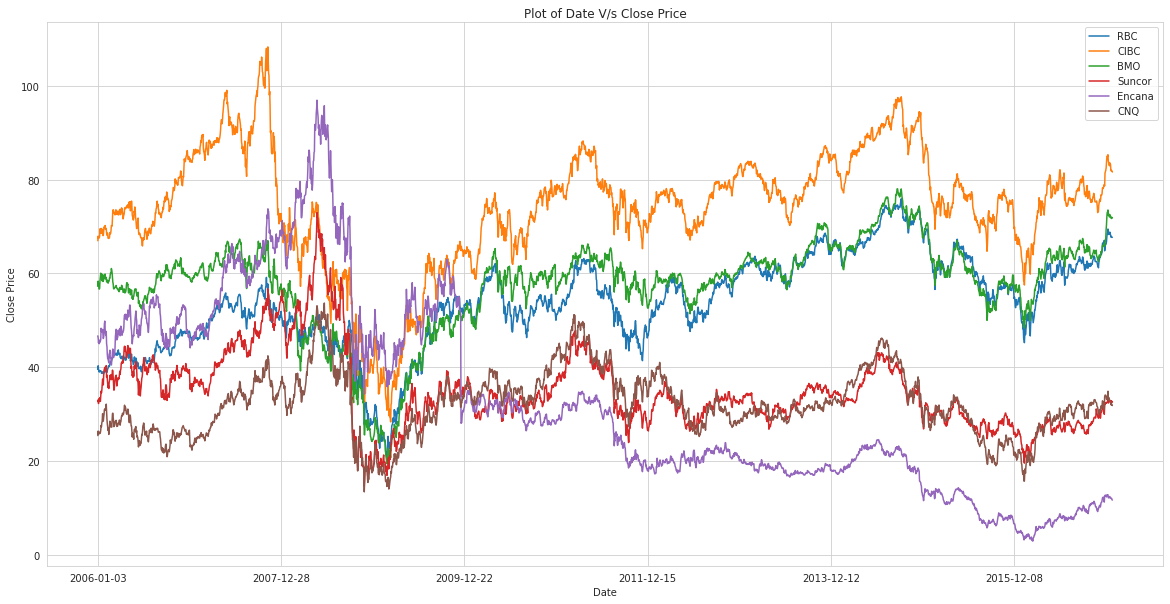

In [17]:
ent = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']
for e in ent:
  bo[e]['Close'].plot(figsize=(20,10),label=e)
plt.ylabel("Close Price")
plt.title("Plot of Date V/s Close Price")
plt.legend()
plt.show()



---
### **All stock went down between 2008 and 2009, Checking the change in oil price and US oil fund stock**
---





In [18]:
wti.columns=['Oil Price']
wti.head()

,Oil Price
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


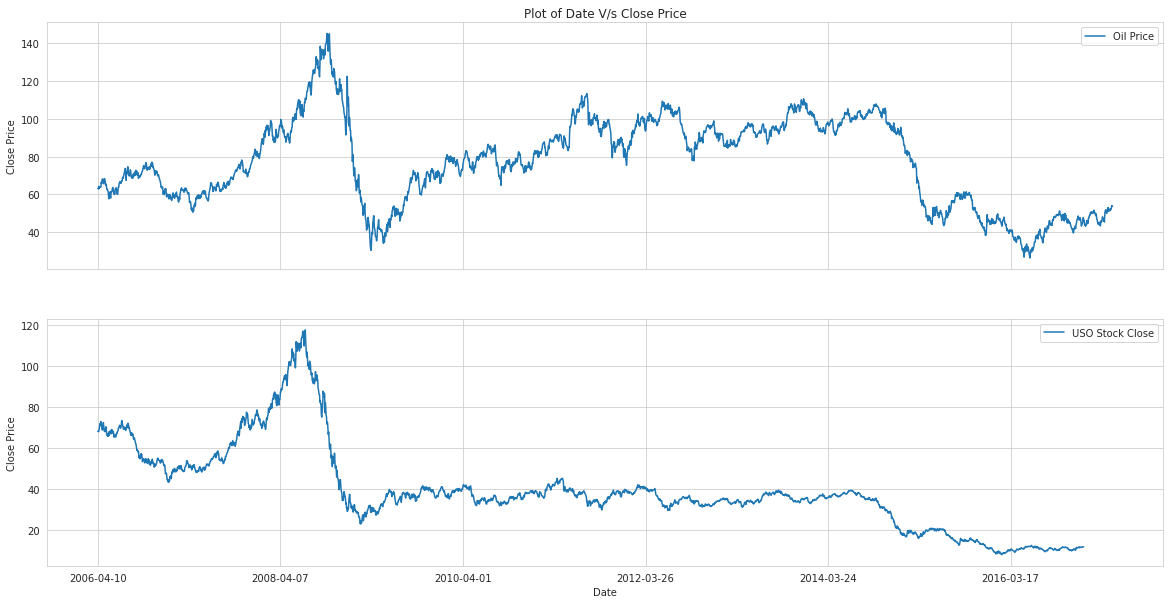

In [19]:
fig, axes = plt.subplots(nrows=2, figsize=(20, 10), sharex=True)
wti[::-1].plot(kind='line',ax=axes[0],label="WTI Oil Prices")
uso['Close'].plot(ax=axes[1],label = 'USO Stock Close')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Close Price")
axes[1].set_ylabel("Close Price")
axes[0].set_title("Plot of Date V/s Close Price")
plt.legend()
plt.show()



---
### **Calculating ROI for each entity in DataFrame in a new DataFrame**
---
Note: First Column is NaN as there is no previous value before first value


In [20]:
returns=pd.DataFrame()
ent = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']
for e in ent:
  returns[e+' return']=bo[e]['Close'].pct_change()
returns.head()

,RBC return,CIBC return,BMO return,Suncor return,Encana return,CNQ return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.018944,0.014333,0.019389,0.010073,-0.008565,0.037677
2006-01-05,-0.021319,-0.006918,-0.014736,-0.023874,-0.023326,-0.027231
2006-01-06,-0.005066,0.004002,-0.005913,0.031269,0.014153,0.010886
2006-01-09,-0.007128,-0.001624,-0.008572,-0.012309,-0.017662,0.006154


In [21]:
returns=returns.iloc[1:,:]
returns.head()

,RBC return,CIBC return,BMO return,Suncor return,Encana return,CNQ return
Date,,,,,,
2006-01-04,0.018944,0.014333,0.019389,0.010073,-0.008565,0.037677
2006-01-05,-0.021319,-0.006918,-0.014736,-0.023874,-0.023326,-0.027231
2006-01-06,-0.005066,0.004002,-0.005913,0.031269,0.014153,0.010886
2006-01-09,-0.007128,-0.001624,-0.008572,-0.012309,-0.017662,0.006154
2006-01-10,0.008974,0.005175,0.003176,0.014590,0.011321,0.001529




---
### **Pairplot for the DataFrame**
---





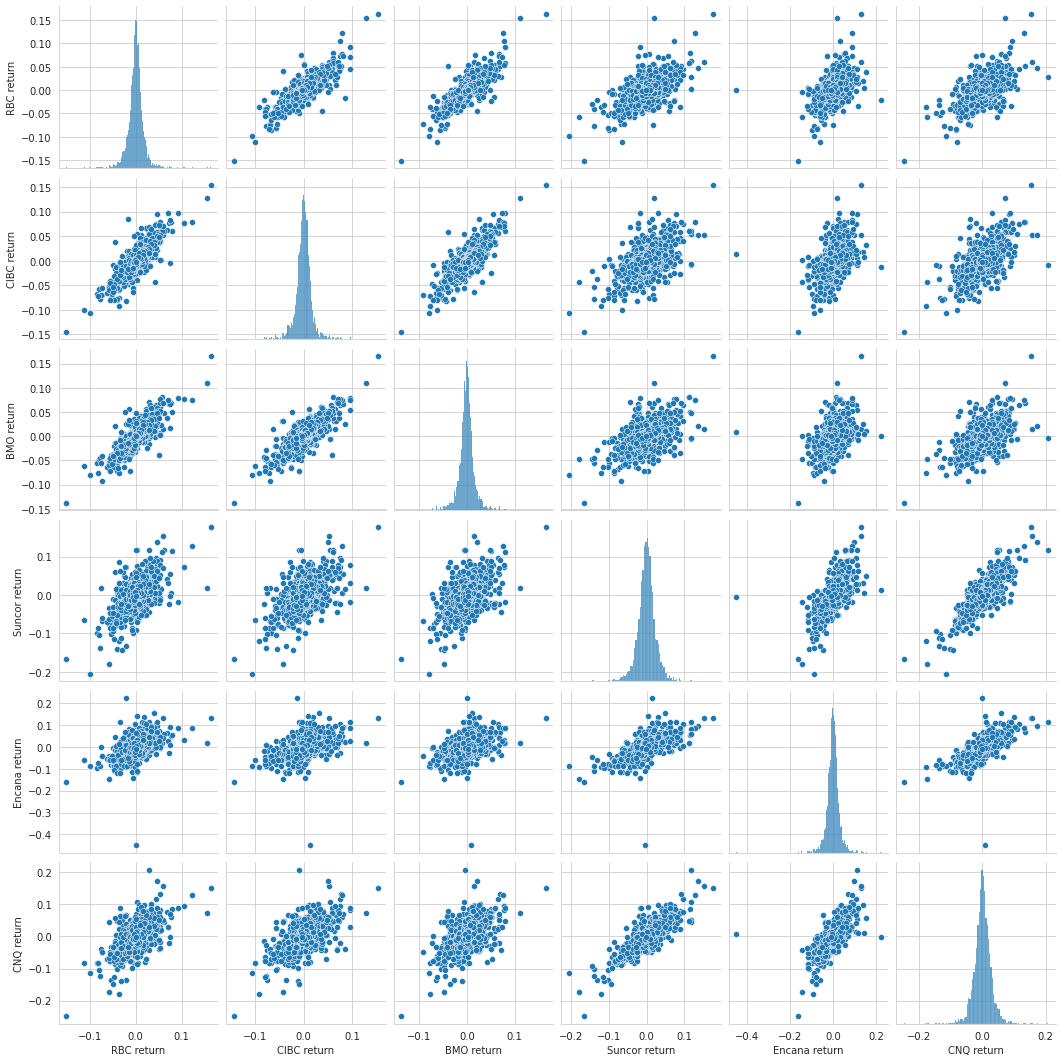

In [22]:
sns.pairplot(returns)
plt.show()



---
### **Finding the below values**
---


*   **Best single day gain**
*   **The worst single day drop**



In [23]:
print(f"Best single day gain are as follows\n{returns.idxmax()}")

Best single day gain are as follows
RBC return       2008-10-13
CIBC return      2008-10-13
BMO return       2008-10-13
Suncor return    2008-10-13
Encana return    2016-02-24
CNQ return       2008-11-21
dtype: object


In [24]:
print(f"Worst single day loss are as follows\n{returns.idxmin()}")

Worst single day loss are as follows
RBC return       2008-11-20
CIBC return      2008-11-20
BMO return       2008-11-20
Suncor return    2009-01-20
Encana return    2009-12-09
CNQ return       2008-11-20
dtype: object




---
### **The riskiest stock over the entire time period**
---



In [25]:
print(f"Stock risk over time are below as follows\n{returns.std()}\nBy assessing the above values we can see the riskiest stock is of {returns.columns[-2]}")

Stock risk over time are below as follows
RBC return       0.017404
CIBC return      0.018244
BMO return       0.016974
Suncor return    0.026503
Encana return    0.029234
CNQ return       0.028247
dtype: float64
By assessing the above values we can see the riskiest stock is of Encana return




---
### **The riskiest stock in 2008 compared to 2016**
---





In [26]:
print(f"Stock risk in 2007 is below as follows\n{returns.loc['2008-01-01':'2008-12-30',:].std()}\nAnd after assessment it is {returns.columns[-1]}")

Stock risk in 2007 is below as follows
RBC return       0.031713
CIBC return      0.036268
BMO return       0.031502
Suncor return    0.049237
Encana return    0.040976
CNQ return       0.054149
dtype: float64
And after assessment it is CNQ return


In [27]:
print(f"Stock risk in 2007 is below as follows\n{returns.loc['2016-01-01':'2016-12-30',:].std()}\nAnd after assessment it is {returns.columns[-2]}")

Stock risk in 2007 is below as follows
RBC return       0.013636
CIBC return      0.013055
BMO return       0.012131
Suncor return    0.020997
Encana return    0.046978
CNQ return       0.027645
dtype: float64
And after assessment it is Encana return




---
### **Visualizing the returns of Encana and CNQ in 2008**
---





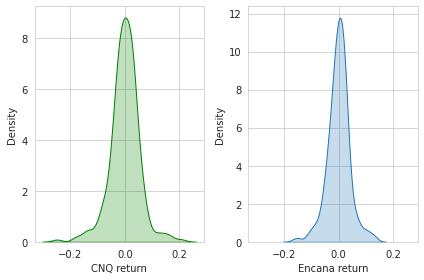

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,sharey=False)
sns.kdeplot(x=returns.loc['2008-01-01':'2008-12-30',:]['Encana return'],shade=True,cbar=True,ax=axes[1])
sns.kdeplot(x=returns.loc['2008-01-01':'2008-12-30',:]['CNQ return'],shade=True,cbar=True,ax=axes[0],color='green')
plt.tight_layout()
plt.show()



---
### **Analysing the moving average of stocks in 30 days for 2008**
---





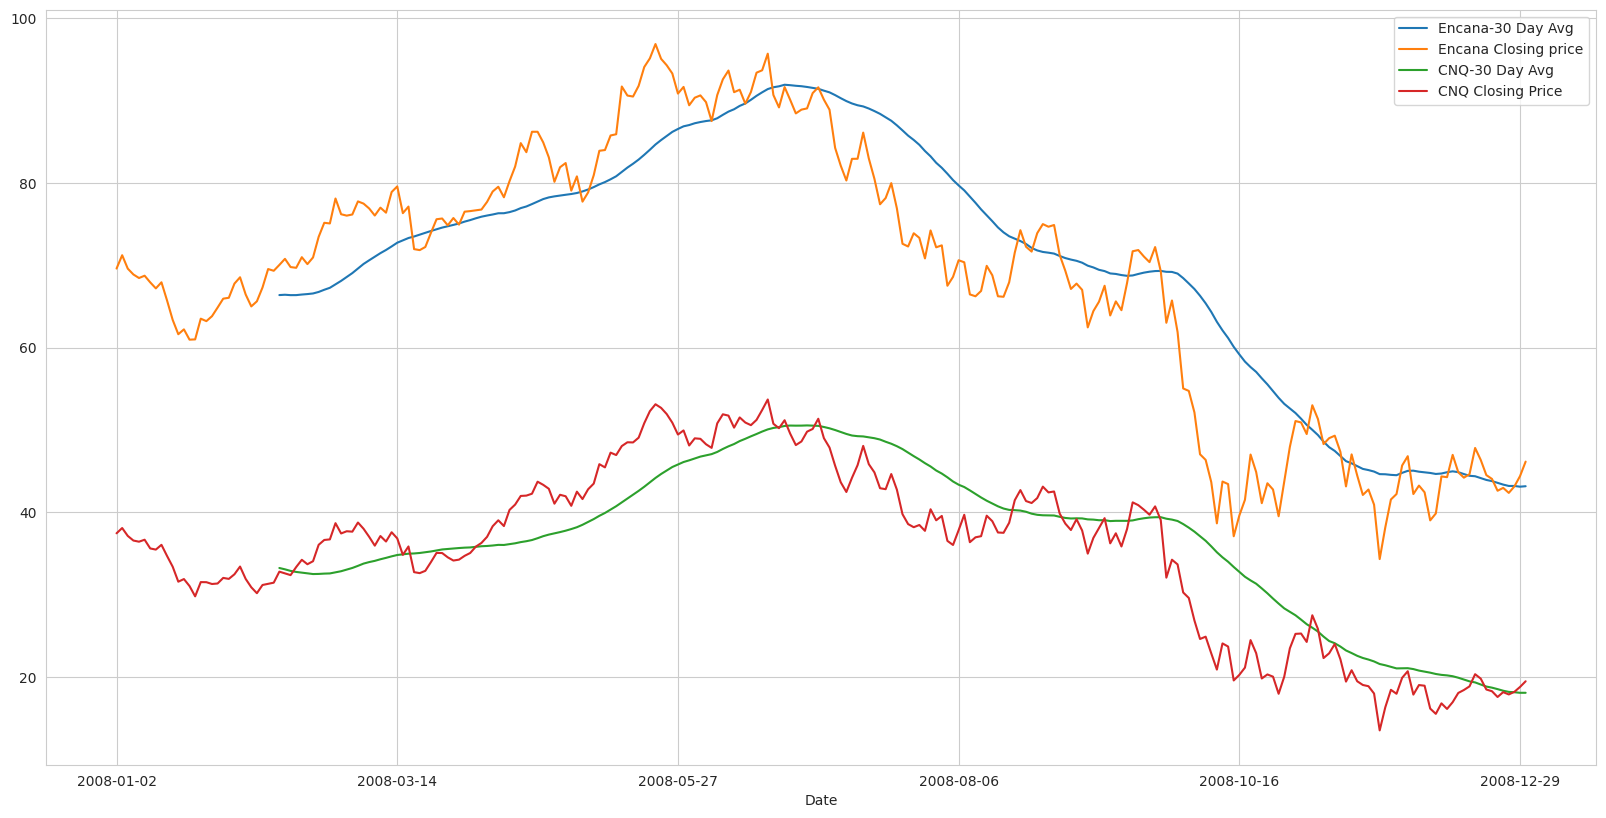

In [29]:
plt.figure(figsize=(20,10),dpi=100)
encana['Close'].loc['2008-01-01':'2008-12-30'].rolling(window=30).mean().plot(label='Encana-30 Day Avg')
encana['Close'].loc['2008-01-01':'2008-12-30'].plot(label='Encana Closing price')
cnq['Close'].loc['2008-01-01':'2008-12-30'].rolling(window=30).mean().plot(label='CNQ-30 Day Avg')
cnq['Close'].loc['2008-01-01':'2008-12-30'].plot(label='CNQ Closing Price')
plt.legend()
plt.show()



---
### **Correlation between stock price and close price**
---





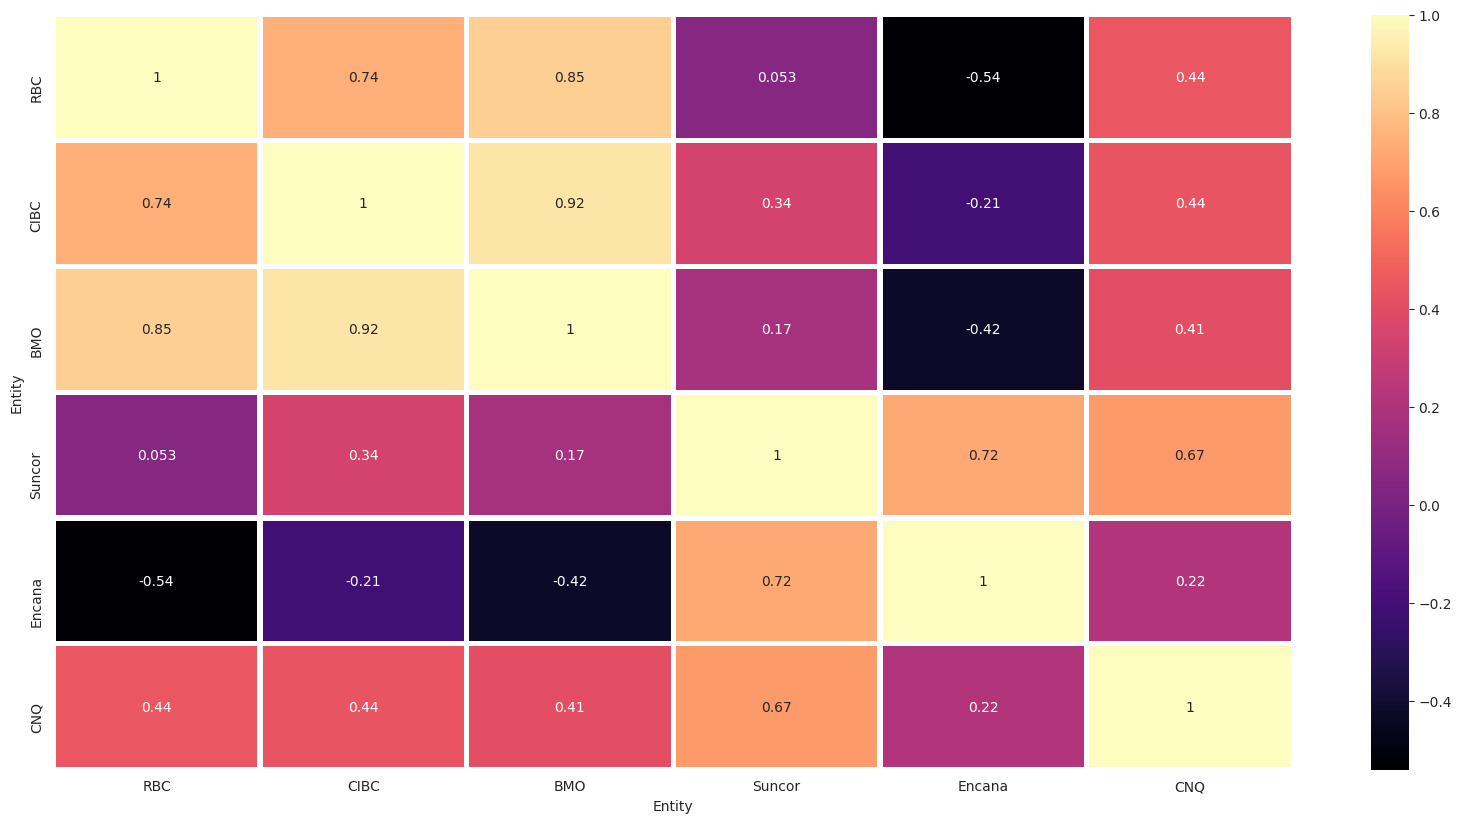

In [30]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(data=(bo.xs(key='Close',level='Stock',axis=1)).corr(),annot=True,linewidths=3,cmap='magma')
plt.show()



---
### **Correlated price forming different clusters**
---





<Figure size 2000x1000 with 0 Axes>

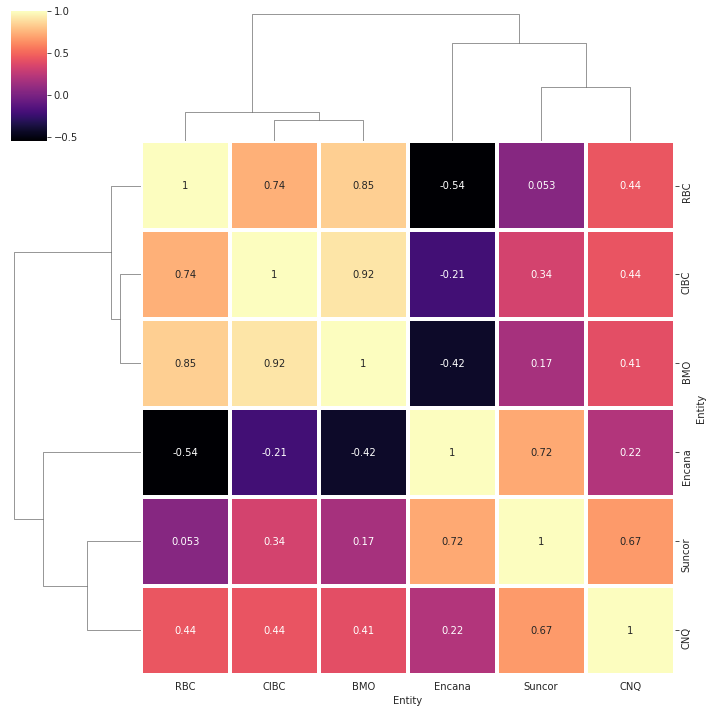

In [31]:
plt.figure(figsize=(20,10),dpi=100)
sns.clustermap(data=(bo.xs(key='Close',level='Stock',axis=1)).corr(),annot=True,linewidths=3,cmap='magma')
plt.show()